# Importing Libraries



In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Data Loading

In [ ]:
# Data Loading from CSV file
ev_charging_df = pd.read_csv(r"ev_charging_patterns.csv")

In [ ]:
# Checking Starting few data
ev_charging_df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [ ]:
# Checking type of column data
ev_charging_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

Using stastical function DESCRIBE to understand the data

In [ ]:
# Checking Stats for the data
ev_charging_df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


### Data Visualization

Using stastical function CORR to SEE CORRELATION between the data

In [ ]:
# Function for correlation

def plot_correlation_matrix(df):

    """
    Plot a correlation matrix for numeric columns in the dataset.

    Parameters:
    df (DataFrame): DataFrame containing EV charging data.

    Returns:
    None
    """

    # Select numeric columns relevant for correlation analysis
    numeric_cols = [
        "Battery Capacity (kWh)", "Charging Duration (hours)", "Energy Consumed (kWh)",
        "Charging Rate (kW)", "Charging Cost (USD)", "State of Charge (Start %)",
        "State of Charge (End %)", "Distance Driven (since last charge) (km)",
        "Temperature (°C)", "Vehicle Age (years)"
    ]

    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()

    # Plot heatmap of correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

    # Title for the plot
    plt.title("Correlation Matrix of Key Features")
    plt.show()

Histogram - Charging Duration

In [ ]:
# Function for Histogram - Charging Duration

def plot_charging_duration_histogram(df):

    """
    Plot a histogram of charging duration, highlighting the mean and median.

    Parameters:
    df (DataFrame): DataFrame containing EV charging data with "Charging Duration (hours)" column.

    Returns:
    None
    """

    # Initializing histogram plot for charging duration distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df["Charging Duration (hours)"], bins=20, color="skyblue", edgecolor="black")

    # Calculate mean
    mean_duration = df["Charging Duration (hours)"].mean()

    # Calculate median
    median_duration = df["Charging Duration (hours)"].median()

    # Adding lines for mean and median values
    plt.axvline(mean_duration, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_duration:.2f}')
    plt.axvline(median_duration, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_duration:.2f}')

    # Label for x-axis and y-axis
    plt.xlabel("Charging Duration (hours)")
    plt.ylabel("Frequency")

    # Title and legend for plot
    plt.title("Distribution of Charging Duration")
    plt.legend()
    plt.show()

Pie Chart - Charger type Distribution

In [ ]:
# Function for pie chart - charger type distribution

def plot_charger_type_pie_chart(df):

    """
    Plot a pie chart of charger type distribution.

    Parameters:
    df (DataFrame): DataFrame containing EV charging data with "Charger Type" column.

    Returns:
    None
    """

    # Count occurrences of each charger type
    charger_counts = df["Charger Type"].value_counts()

    # Plot pie chart for charger types
    plt.figure(figsize=(8, 8))
    plt.pie(charger_counts, labels=charger_counts.index, autopct="%1.1f%%",
            startangle=140, colors=["#66c2a5", "#fc8d62", "#8da0cb"])

    # Title for the pie chart
    plt.title("Charger Type Distribution")
    plt.show()

Violin plot - Energy consumed by user type

In [ ]:
# Function for Violin plot - energy consumed by user type

def plot_energy_consumed_violin_plot(df):

    """
    Plot a violin plot of energy consumed by user type.

    Parameters:
    df (DataFrame): DataFrame containing EV charging data with "User Type" and "Energy Consumed (kWh)" columns.

    Returns:
    None
    """

    # Plot violin plot for distribution of energy consumed by user type
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='User Type', y='Energy Consumed (kWh)', data=df, palette="Set2")

    # Title for the violin plot
    plt.title("Energy Consumed by User Type")

    # Labelling for x-axis and y-axis
    plt.xlabel("User Type")
    plt.ylabel("Energy Consumed (kWh)")

    # Displaying grid
    plt.grid(True)
    plt.show()

Function Calling for Plots

<Figure size 640x480 with 0 Axes>

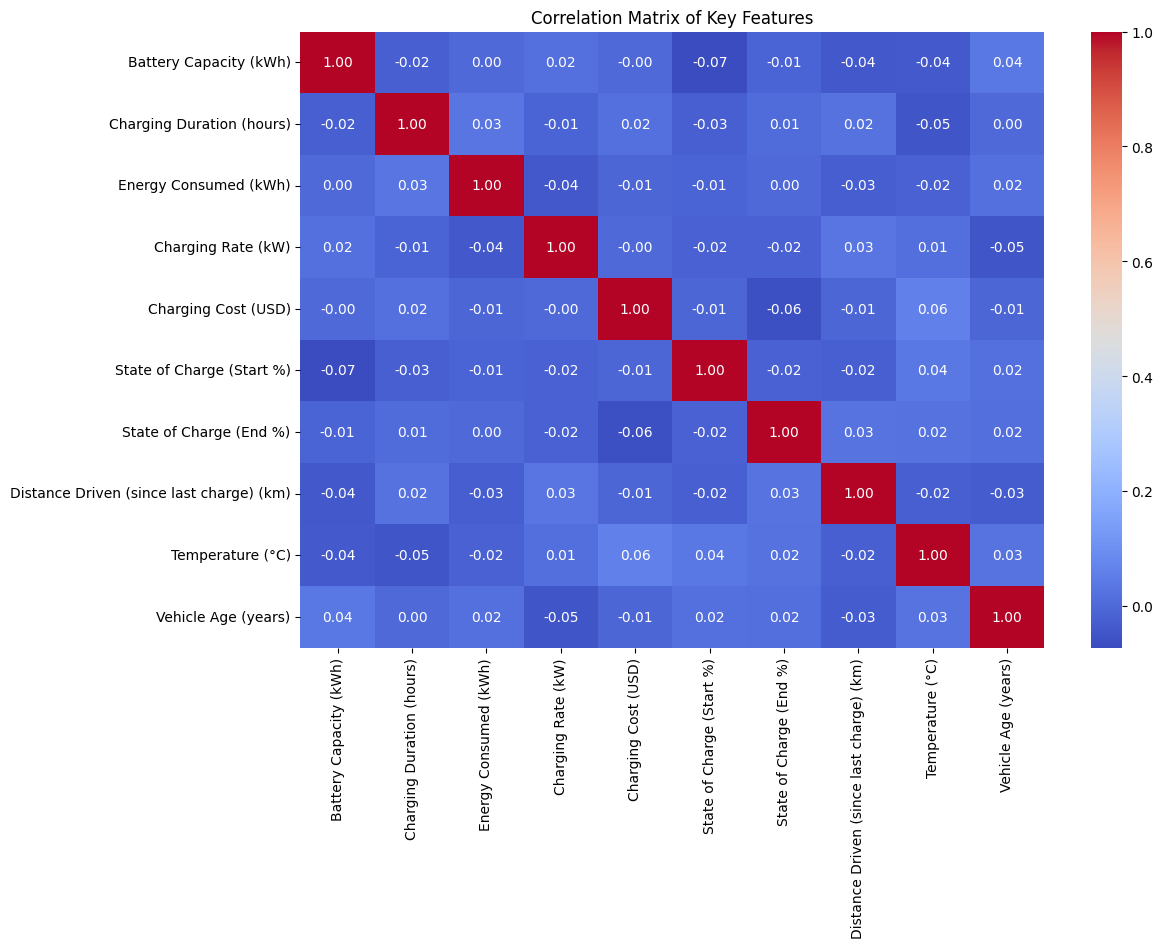

<Figure size 640x480 with 0 Axes>

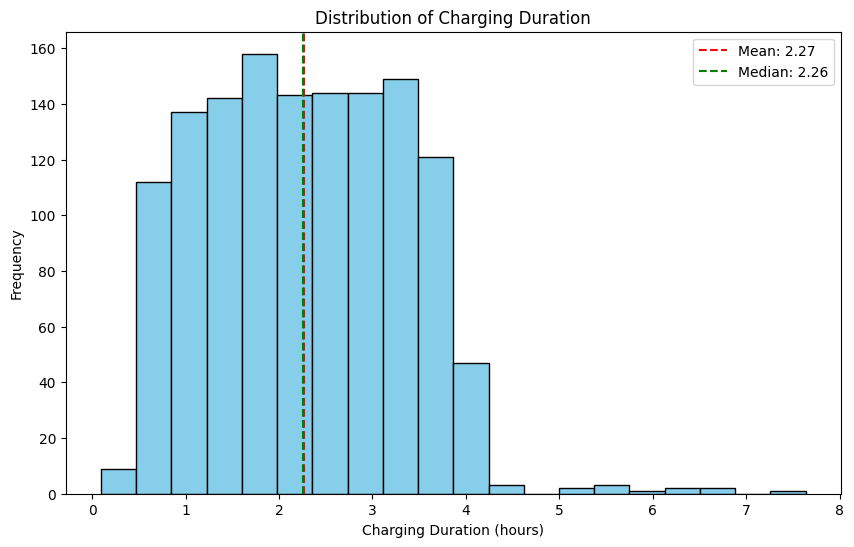

<Figure size 640x480 with 0 Axes>

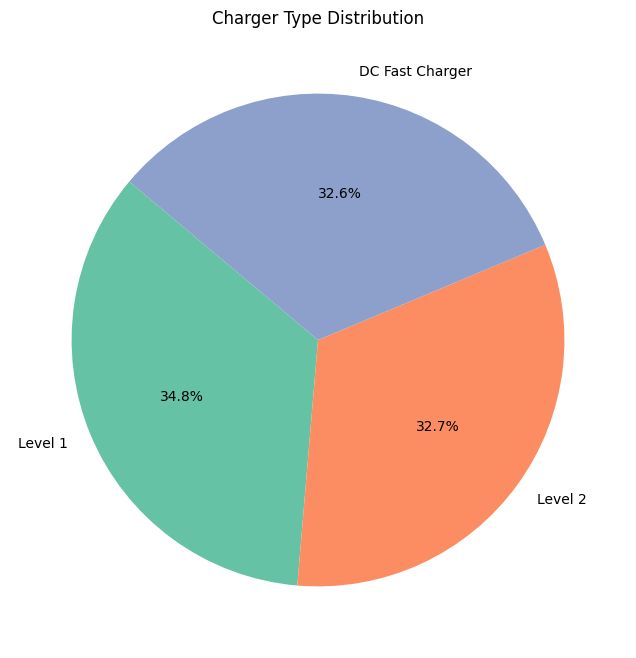

<ipython-input-26-255ba636144c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='User Type', y='Energy Consumed (kWh)', data=df, palette="Set2")


<Figure size 640x480 with 0 Axes>

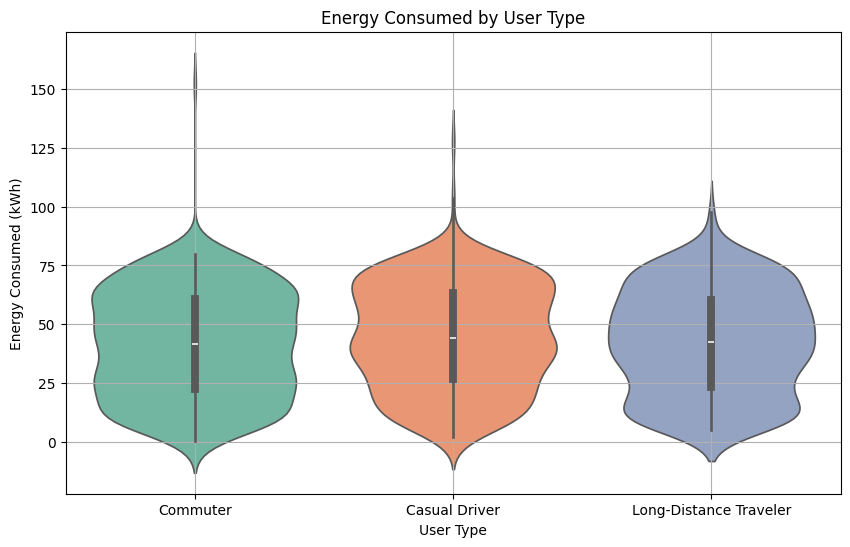

In [ ]:
# Plot Correlation Matrix
plt.figure()
plot_correlation_matrix(ev_charging_df)

# Plot Charging Duration Histogram
plt.figure()
plot_charging_duration_histogram(ev_charging_df)

# Plot Charger Type Pie Chart
plt.figure()
plot_charger_type_pie_chart(ev_charging_df)

# Plot Energy Consumed Violin Plot
plt.figure()
plot_energy_consumed_violin_plot(ev_charging_df)
